# Introduction 

In this notebook we will learn the basics of plotting with matplotlib 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import h5py
import yaml
import pickle 
import mplhep as hep
import awkward as ak
import sklearn.metrics as metrics

plt.rcParams['figure.dpi'] = 100

/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-pac

In [2]:
# Let's open the same file
filename = "/uscms/home/jpearkes/eos/forAda/scouting_nano.root" # originally from root://hip-cms-se.csc.fi//store/user/pinkaew/scouting_nano_prod_golden/ScoutingPFRun3/crab_ScoutingPFRun3_Run2024D-v1_380385-380470_Golden/240517_205837/0000/scouting_nano_399.root

file = uproot.open(filename)

In [3]:
# Let make a histogram of jet pt
jet_pt = file["Events"]["ScoutingJet_pt"].array()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


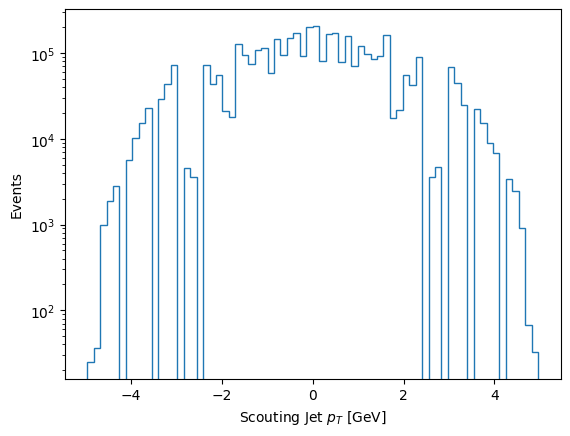

In [6]:
plt.hist(ak.flatten(file["Events"]["L1Jet_eta"].array()),
         bins=70,
 #        range = (0,1000),
         histtype='step')
plt.yscale('log')
plt.xlabel(r"Scouting Jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


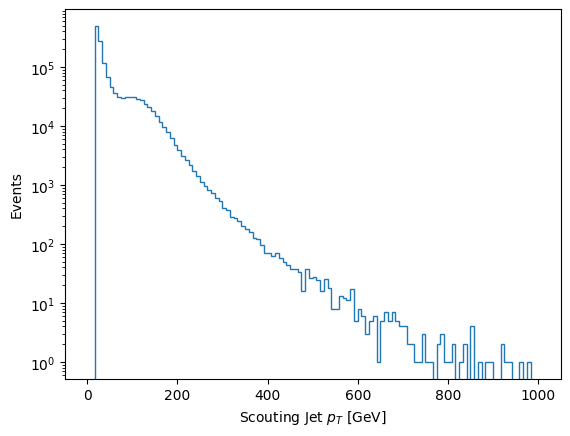

In [30]:
plt.hist(ak.flatten(jet_pt),
         bins=120,
         range = (0,1000),
         histtype='step')
plt.yscale('log')
plt.xlabel(r"Scouting Jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)

# Questions

 **What is ak.flatten doing here?**
 
ak.flatten eliminates the nested lists within the awkward array. It creates a vector populated with all the entries of the original awkward array, independent of their original configuration. 

**Can you change the y axis scale to a log scale?**

To change an axis to a log scale, add the line <plt.yscale('log')>

**Play around with the bin size, what bin size do you think makes sense?** 

Changing the bin size is similar to changing the number of pixels in an image - fewer pixels corresponds to a grainier picture, just as fewer bins leads to less precise data. However, you can have too many bins; for example, setting 1000 bins is a little excessive and makes the data hard to view. The most prominent parts of this plot are the peak at 25 GeV, dip at 550 GeV, gradual decrease up to 1000 GeV. Any bin size between 80-120 successfully demonstrates these characteristics, without too much distraction

**Play around with the range, if you remove range = (0,1000), it will autoscale**

So it does!

**Can you plot pt, eta and phi for all Scouting and L1 jets, electrons, and muons?**
* Hint: use for loops to save yourself time
* Discuss the shape of these distributions with Keith/Jen/Abhi/me
    
Plots are located below.


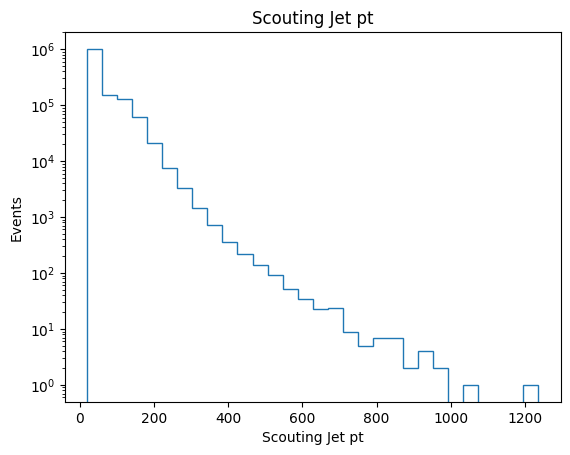

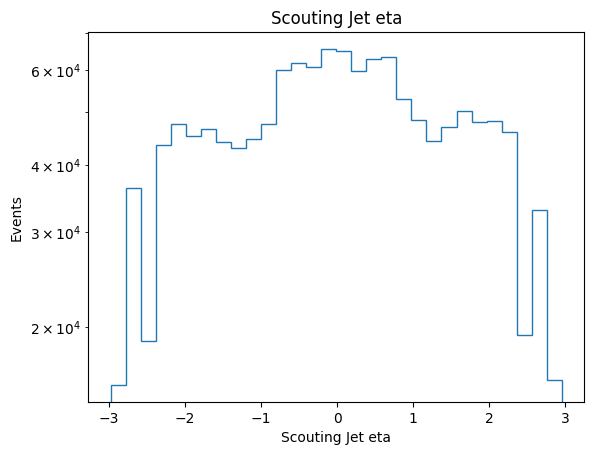

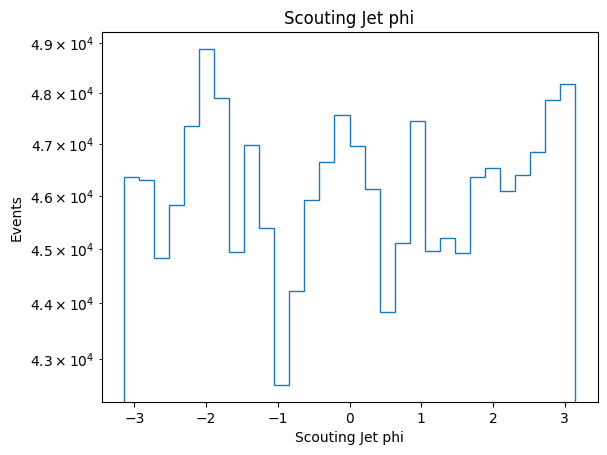

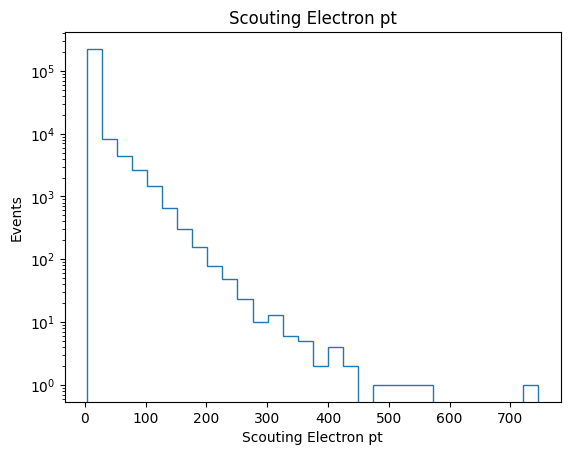

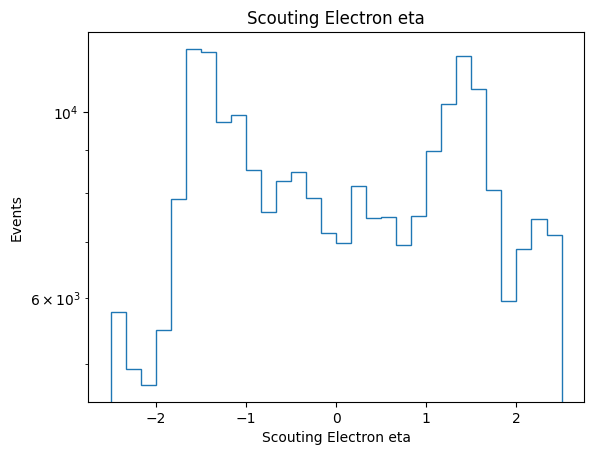

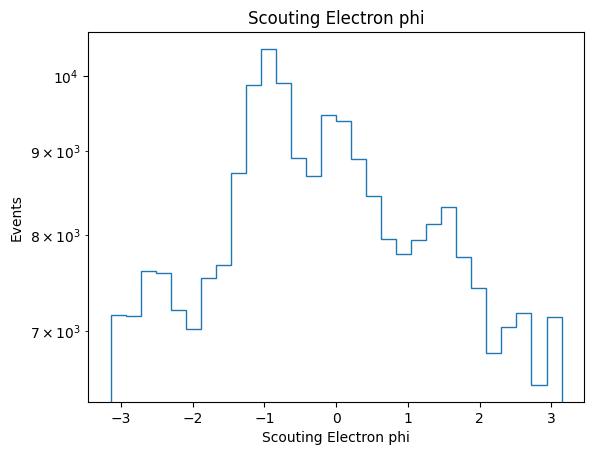

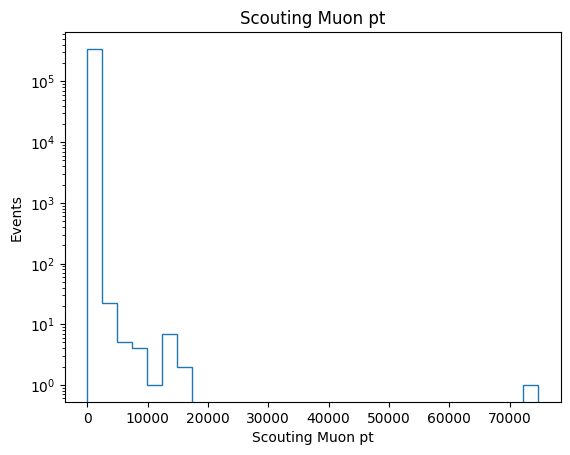

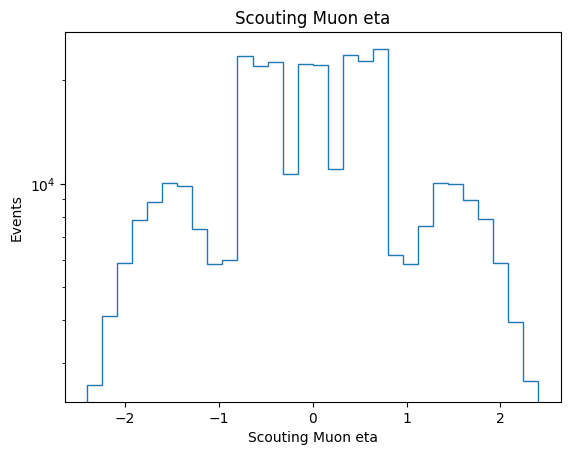

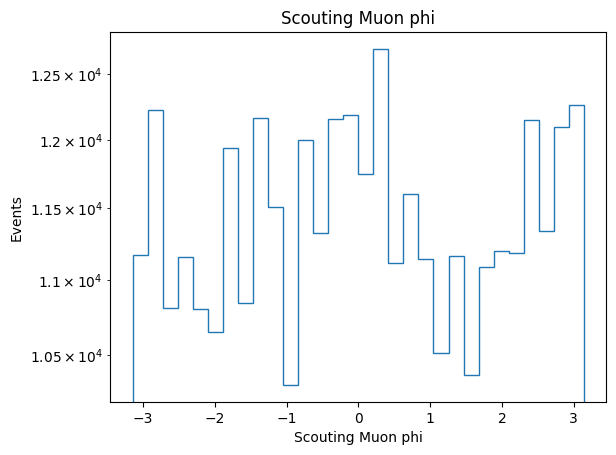

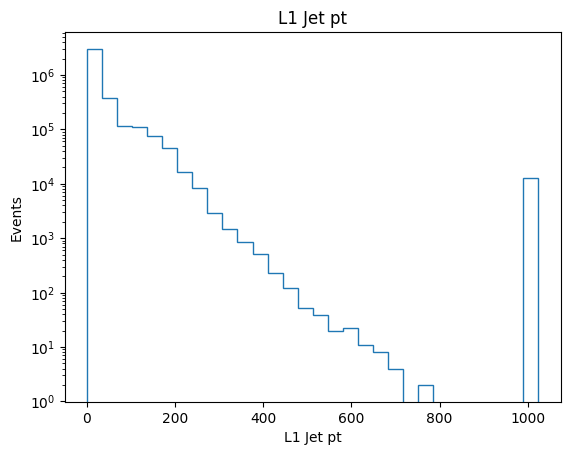

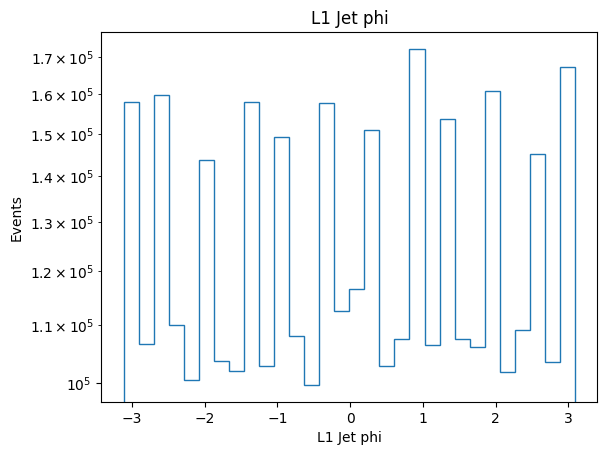

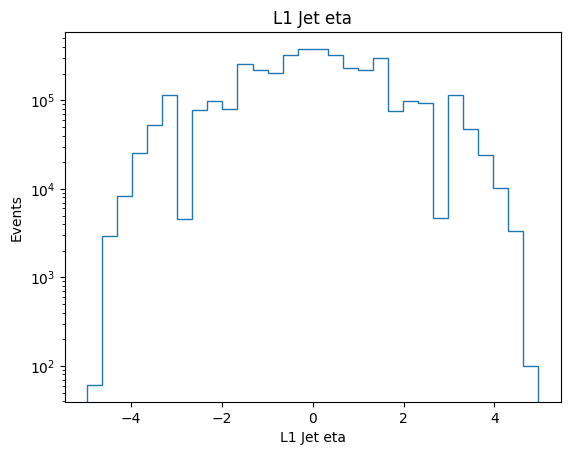

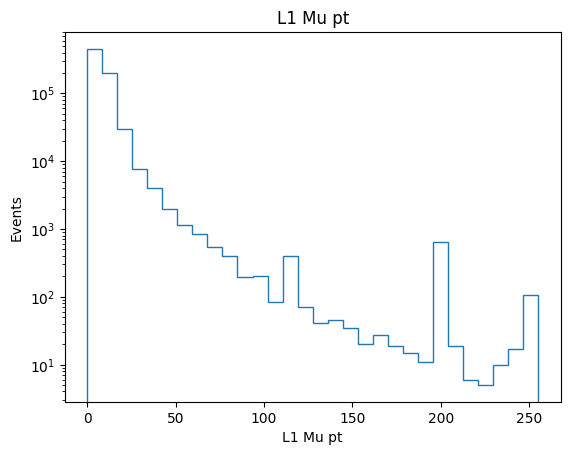

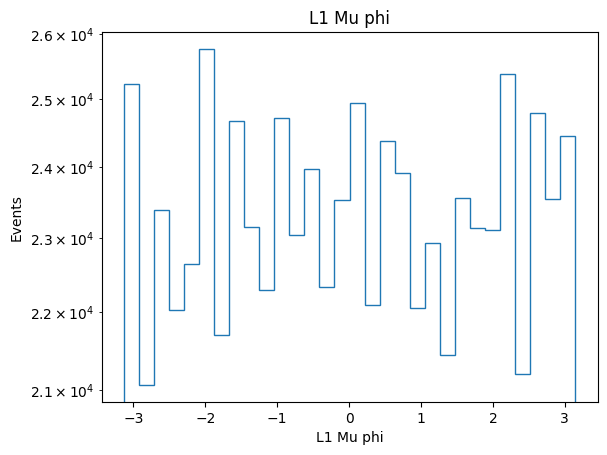

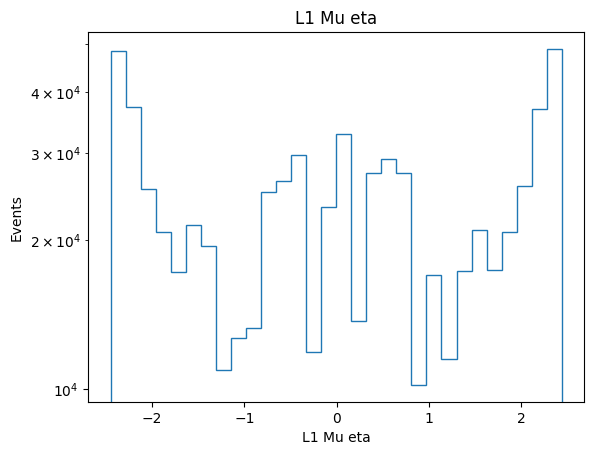

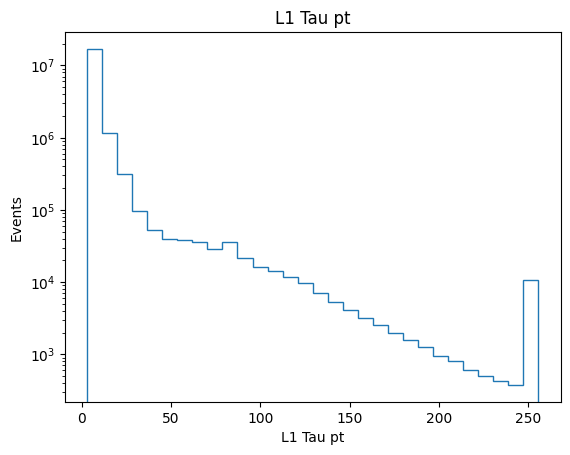

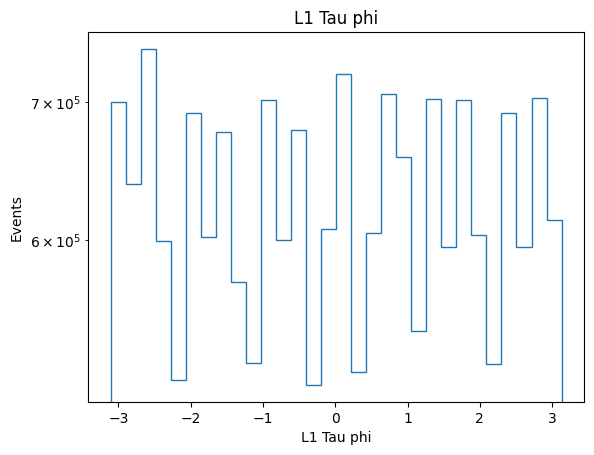

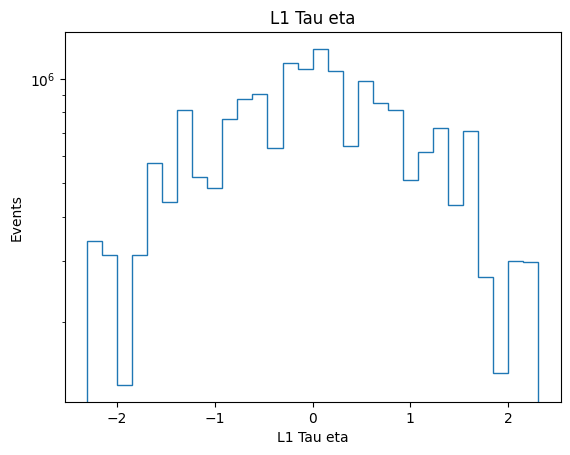

In [54]:
# Plotting pt, eta and phi for all Scouting and L1 jets, electrons, and muons
events = file["Events"]
dtest ={
    "Scouting Jet pt" : events["ScoutingJet_pt"].array(),
    "Scouting Jet eta" : events["ScoutingJet_eta"].array(),
    "Scouting Jet phi" : events["ScoutingJet_phi"].array(),
    "Scouting Electron pt" : events["ScoutingElectron_pt"].array(),
    "Scouting Electron eta" : events["ScoutingElectron_eta"].array(),
    "Scouting Electron phi": events["ScoutingElectron_phi"].array(),
    "Scouting Muon pt" : events["ScoutingMuonNoVtx_pt"].array(),
    "Scouting Muon eta" : events["ScoutingMuonNoVtx_eta"].array(),
    "Scouting Muon phi" : events["ScoutingMuonNoVtx_phi"].array(),
    "L1 Jet pt" : events["L1Jet_pt"].array(),
    "L1 Jet phi" : events["L1Jet_phi"].array(),
    "L1 Jet eta" : events["L1Jet_eta"].array(),
    "L1 Mu pt" : events["L1Mu_pt"].array(),
    "L1 Mu phi" : events["L1Mu_phi"].array(),
    "L1 Mu eta" : events["L1Mu_eta"].array(),
    "L1 Tau pt" : events["L1Tau_pt"].array(),
    "L1 Tau phi" : events["L1Tau_phi"].array(),
    "L1 Tau eta" : events["L1Tau_eta"].array(),
}


for key,value in dtest.items():
    plt.hist(ak.flatten(value),
         bins=30,  #--> now there are too few, but a little better to look at?
        # range = (0,1000),
         histtype='step')
    plt.yscale('log')
    plt.xlabel(key)
    plt.ylabel("Events")
    plt.title(key)
    plt.show()
    #plt.legend(frameon=False)

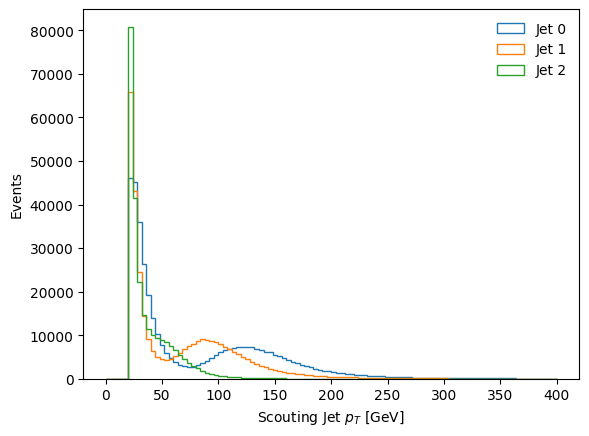

In [89]:
# Now let's plot the "leading" (highest pt), "subleading", second highest pt, and "third leading" jets. 
# In general objects are automatically ordered by pt 


plt.hist(ak.flatten(jet_pt[:,0:1]),
         bins=100,
         range = (0,400),
         label = "Jet 0",
         histtype='step')

plt.hist(ak.flatten(jet_pt[:,1:2]),
         bins=100,
         range = (0,400),
         label = "Jet 1",
         histtype='step')

plt.hist(ak.flatten(jet_pt[:,2:3]),
         bins=100,
         range = (0,400),
         label = "Jet 2",
         histtype='step')

plt.xlabel(r"Scouting Jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)


# Questions
**Can you rewrite this code to use a for loop and plot up to the 10th leading jet?**

Done below

**What are the maximum number of scouting jets in an event?** 

34 jets

**What are the maximum number of L1 jets in an event?**

26 jets

**Try the same for electrons and muons**

Plots are below, will revisit middle questions. 

In [15]:
# Max number of scouting and L1 jets
print(np.max(ak.num(dtest["Scouting Jet pt"], axis=1)))
print(np.max(ak.num(dtest["L1 Jet pt"], axis=1)))

34
26


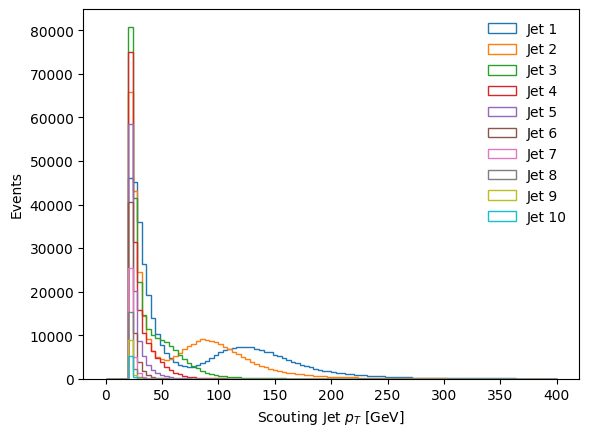

In [112]:
# Rewrite leading pt code up to 10th leading jet
for i in range(10):
    plt.hist(ak.flatten(jet_pt[:,i:i+1]),
            bins=100,
            range = (0,400),
            label = (f"Jet {i+1}"),
            histtype='step')

plt.xlabel(r"Scouting Jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)

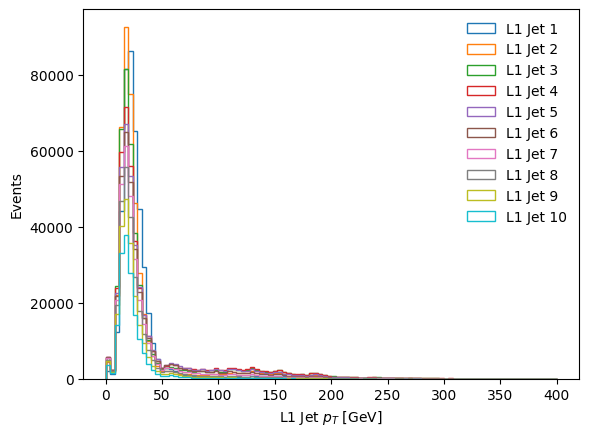

In [123]:
# Doing the same for L1 jet pt
L1_jet_pt = events["L1Jet_pt"].array()
for i in range(10):
    plt.hist(ak.flatten(L1_jet_pt[:,i:i+1]),
            bins=100,
            range = (0,400),
            label = (f"L1 Jet {i+1}"),
            histtype='step')

plt.xlabel(r"L1 Jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)

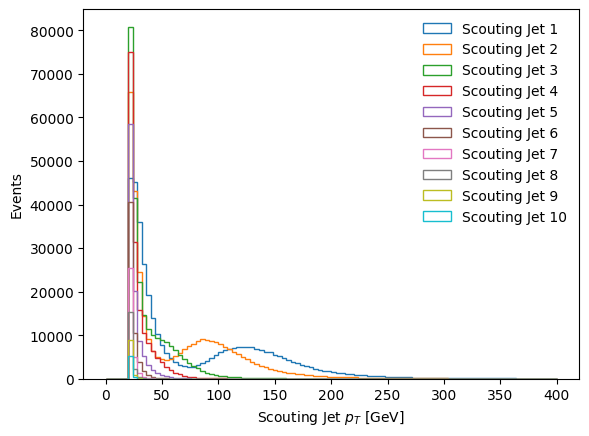

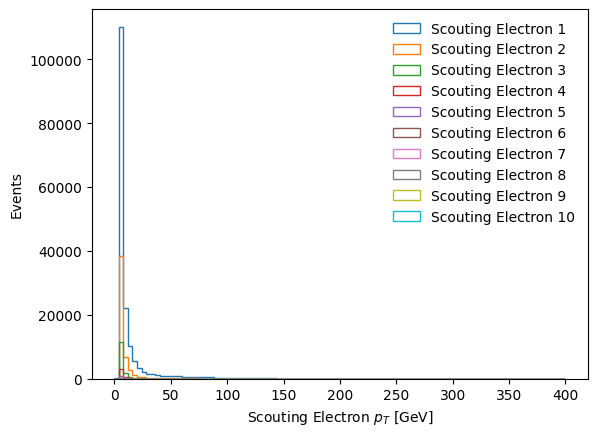

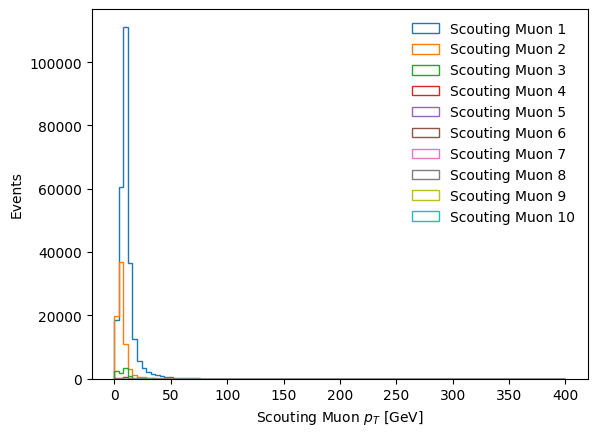

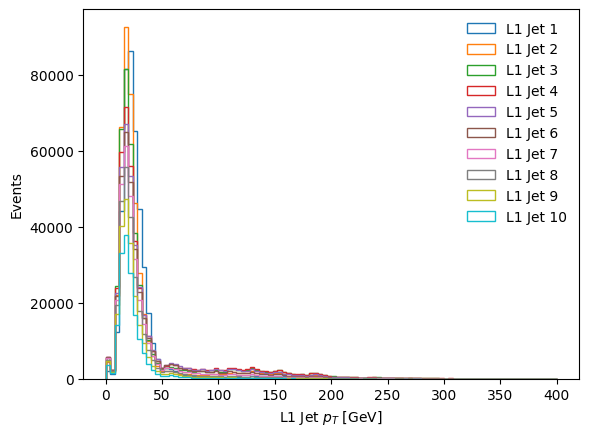

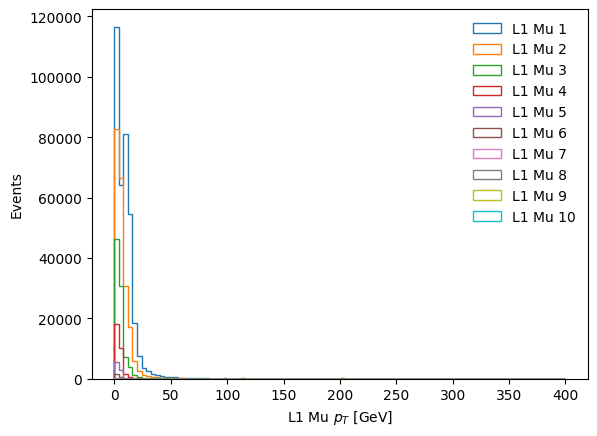

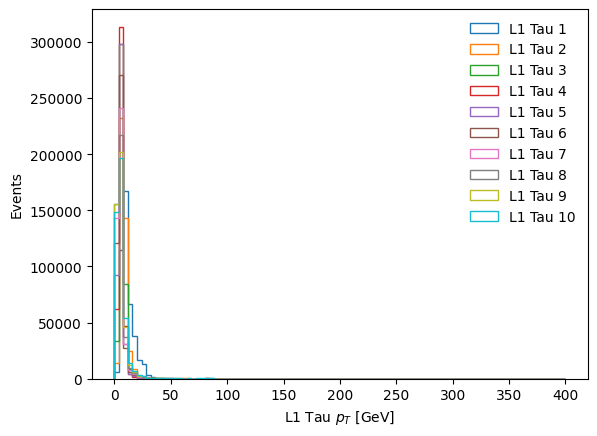

In [55]:
# let's just do it all with a dictionary!
leading_pt = {
    "Scouting Jet" : events["ScoutingJet_pt"].array(),
    "Scouting Electron" : events["ScoutingElectron_pt"].array(),
    "Scouting Muon" : events["ScoutingMuonNoVtx_pt"].array(),
    "L1 Jet" : events["L1Jet_pt"].array(),
    "L1 Mu" : events["L1Mu_pt"].array(),
    "L1 Tau" : events["L1Tau_pt"].array(),
}

for key, value in leading_pt.items():
    for i in range(10):
        plt.hist(ak.flatten(value[:,i:i+1]),
                bins=100,
                range = (0,400),
                label = (f"{key} {i+1}"),
                histtype='step')
        plt.xlabel(f"{key} $p_T$ [GeV]")
        plt.ylabel("Events")
        plt.legend(frameon=False)
    plt.show()

# Invariant mass distributions

Invariant mass is an incredibly important concept in collider physics. https://en.wikipedia.org/wiki/Invariant_mass Here were will calculate the invariant mass distribution of the leading muons.  

In [78]:
! pip3 install pylorentz

  Using cached pylorentz-0.3.3-py3-none-any.whl


In [4]:
from pylorentz import Momentum4 # may need to restart notebook after install above

events = file["Events"]
muon_pt  = events["ScoutingMuonVtx_pt"].array()
muon_eta = events["ScoutingMuonVtx_eta"].array()
muon_phi = events["ScoutingMuonVtx_phi"].array()
muon_m   = events["ScoutingMuonVtx_m"].array()
muon_charge = events["ScoutingMuonVtx_charge"].array()

In [7]:
muon_m

<Array [[0], [-1.25e-07], ..., [0], [0, 0]] type='431555 * var * float32'>

In [8]:
# Lets get the leading and subleading muons 
# First lets mask out any events where there are less than two muons per event
at_least_two_muons = ak.num(muon_pt,axis=1)==2
muon_pt1  = muon_pt[at_least_two_muons]
muon_eta1 = muon_eta[at_least_two_muons]
muon_phi1 = muon_phi[at_least_two_muons]
muon_m1   = muon_m[at_least_two_muons]
muon_charge1 = muon_charge[at_least_two_muons]

In [9]:
muon_charge

<Array [[1], [1], [1], [], ..., [1], [-1], [-1, 1]] type='431555 * var * int32'>

In [10]:
muon1= Momentum4.m_eta_phi_pt(muon_m1[:,0], muon_eta1[:,0], muon_phi1[:,0], muon_pt1[:,0])
muon2= Momentum4.m_eta_phi_pt(muon_m1[:,1], muon_eta1[:,1], muon_phi1[:,1], muon_pt1[:,1])

#Momentum4.m_eta_phi_pt is a function that applies those values to mass, eta, phi, and pt

In [11]:
# This gives the parent particle (IE what each muon decayed from)
dimuon = muon1+muon2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'm$_{\\mu\\mu}$ Invariant Mass')

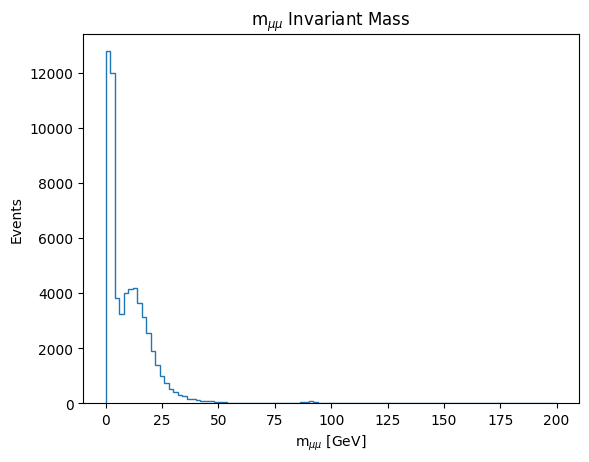

In [12]:
plt.hist(dimuon.m, #The .m is 
         bins=100,
         range = (0,200),
         histtype='step')
plt.xlabel(r"m$_{\mu\mu}$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)
plt.title(r"m$_{\mu\mu}$ Invariant Mass")

In [13]:
# Now let us require that both muons have an opposite charge (+1-1 = 0)
opposite_charge = ak.sum(muon_charge1,axis=1)==0
muon_pt2  = muon_pt1[opposite_charge]
muon_eta2 = muon_eta1[opposite_charge]
muon_phi2 = muon_phi1[opposite_charge]
muon_m2   = muon_m1[opposite_charge]
muon_charge2   = muon_charge1[opposite_charge]

In [14]:
muon1a= Momentum4.m_eta_phi_pt(muon_m2[:,0], muon_eta2[:,0], muon_phi2[:,0], muon_pt2[:,0])
muon2a= Momentum4.m_eta_phi_pt(muon_m2[:,1], muon_eta2[:,1], muon_phi2[:,1], muon_pt2[:,1])
dimuon2 = muon1a+muon2a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'm$_{\\mu\\mu}$ Invariant Mass')

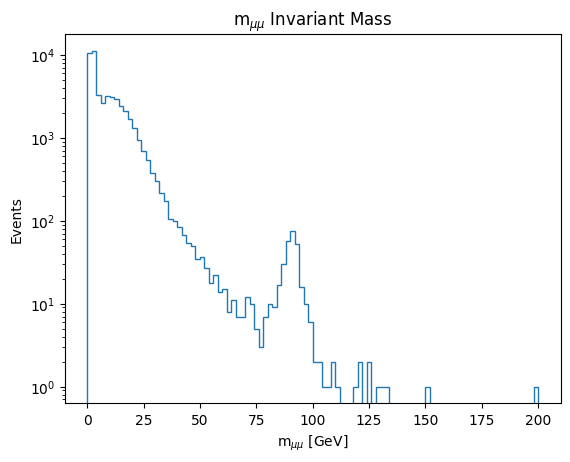

In [15]:
plt.hist(dimuon2.m,
         bins=100,
         range = (0,200),
         histtype='step')
plt.xlabel(r"m$_{\mu\mu}$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)
plt.yscale('log')
plt.title(r"m$_{\mu\mu}$ Invariant Mass")

# Questions

**What standard model particle could that peak around 80 GeV correspond to?** https://en.wikipedia.org/wiki/Standard_Model 

The peak corresponds to a Z boson, which has mass of 91.2 GeV.

**W and Z Boson Decay**
- Mediate weak interactions
- Both Majorana particles, Z is neutral, W can be either positive or negative
- Decay into fermion pairs (cannot decay into top quark) ([Source](https://en.wikipedia.org/wiki/W_and_Z_bosons))
- W --> lepton-antineutrino or quark- antiquark ([Combos](https://www.hep.ucl.ac.uk/~jpc/all/ulthesis/node45.html))
- Z --> lepton-antilepton, neutrino-antineutrino, quark-antiquark ([All combos](https://atlas.physicsmasterclasses.org/en/zpath_lhcphysics2.htm))
- This plot shows Z --> muon and antimuon (we selected pairs with opposite charges)

**Are there ways in which you could make this peak even more prominent? E.g. try filtering to select out slightly higher muon pTs.**

New plot below!


In [95]:
# Let's filter out the lower pts
# Higher max value = more prominent peak. Median=8.37, Mean=9.08 but these don't make very impressive changes
large_pt = ak.max(muon_pt2,axis=1) > 25
muon_pt3  = muon_pt2[large_pt]
muon_eta3 = muon_eta2[large_pt]
muon_phi3 = muon_phi2[large_pt]
muon_m3   = muon_m2[large_pt]
muon_charge3   = muon_charge2[large_pt]

In [191]:
muon1b= Momentum4.m_eta_phi_pt(muon_m3[:,0], muon_eta3[:,0], muon_phi3[:,0], muon_pt3[:,0])
muon2b= Momentum4.m_eta_phi_pt(muon_m3[:,1], muon_eta3[:,1], muon_phi3[:,1], muon_pt3[:,1])
dimuon3 = muon1b + muon2b

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


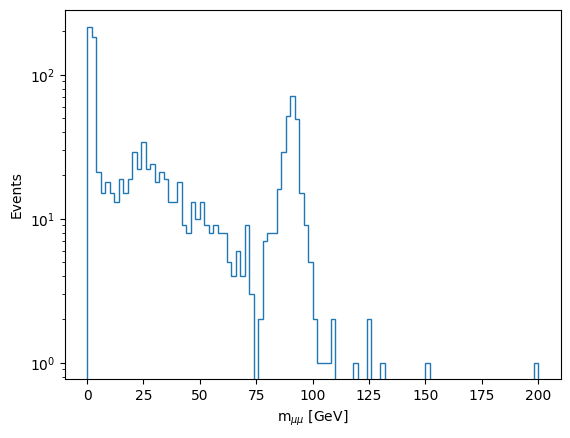

In [192]:
plt.hist(dimuon3.m,
         bins=100,
         range = (0,200),
         histtype='step')
plt.xlabel(r"m$_{\mu\mu}$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)
plt.yscale('log')

In [18]:
np.median(ak.flatten(muon_pt))

8.3671875

In [193]:
ak.mean(muon_pt)

9.077417465165906

## Compare Scouting vs L1 data
Make graphs with each type of data, overlapping the graphs to see the differences

In [51]:
# Reorder the dictionary
events = file["Events"]
scout_l1 ={
    "Scouting Jet pt" : events["ScoutingJet_pt"].array(),
    "L1 Jet pt" : events["L1Jet_pt"].array(),
    "Scouting Jet eta" : events["ScoutingJet_eta"].array(),
    "L1 Jet eta" : events["L1Jet_eta"].array(),
    "Scouting Jet phi" : events["ScoutingJet_phi"].array(),
    "L1 Jet phi" : events["L1Jet_phi"].array(),
    "Scouting Electron pt" : events["ScoutingElectron_pt"].array(),
    "L1 Electron pt" : events["L1EG_pt"].array(), # I don't think this the electron file? Maybe it is?
    "Scouting Electron eta" : events["ScoutingElectron_eta"].array(),
    "L1 Electron eta" : events["L1EG_eta"].array(),
    "Scouting Electron phi": events["ScoutingElectron_phi"].array(),
    "L1 Electron phi" : events["L1EG_phi"].array(),
    "Scouting Muon pt" : events["ScoutingMuonNoVtx_pt"].array(),
    "L1 Mu pt" : events["L1Mu_pt"].array(),
    "Scouting Muon eta" : events["ScoutingMuonNoVtx_eta"].array(),
    "L1 Mu eta" : events["L1Mu_eta"].array(),
    "Scouting Muon phi" : events["ScoutingMuonNoVtx_phi"].array(),
    "L1 Mu phi" : events["L1Mu_phi"].array(),  
}

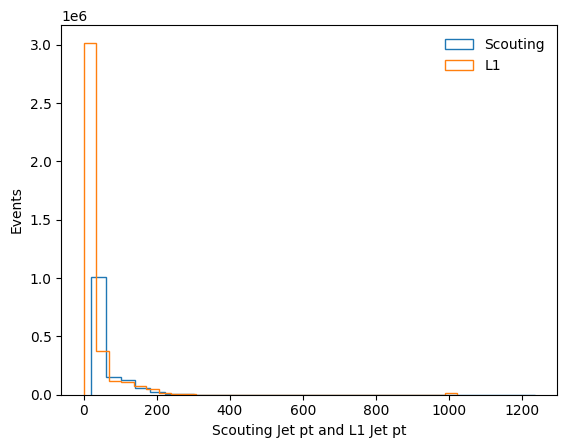

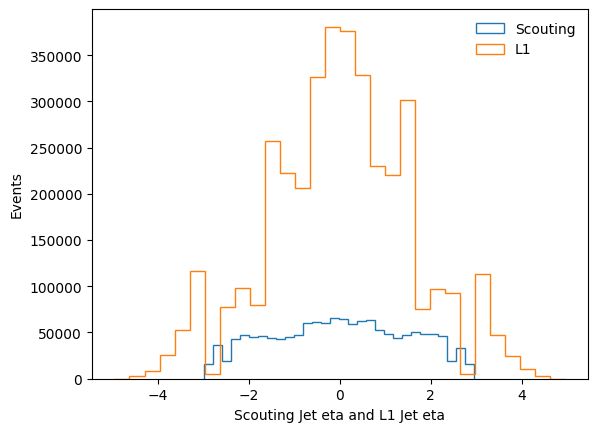

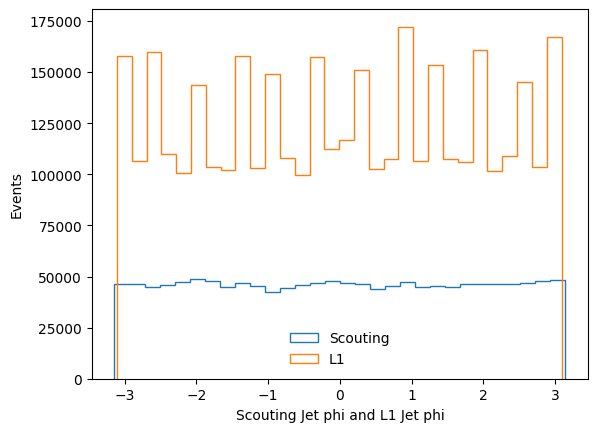

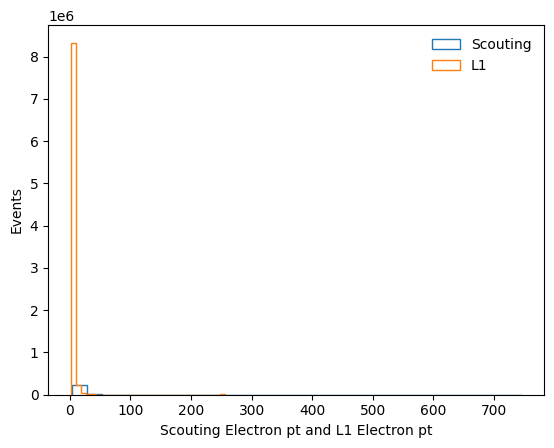

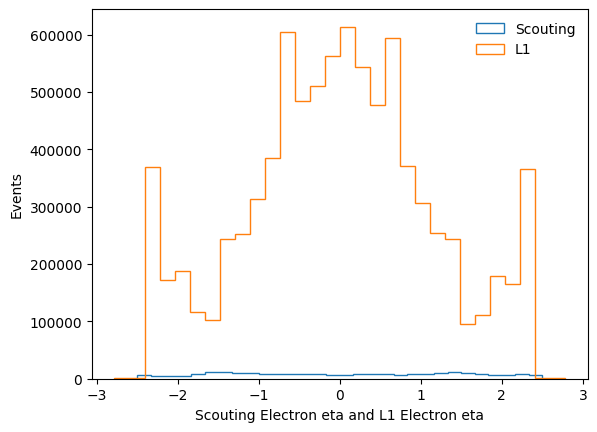

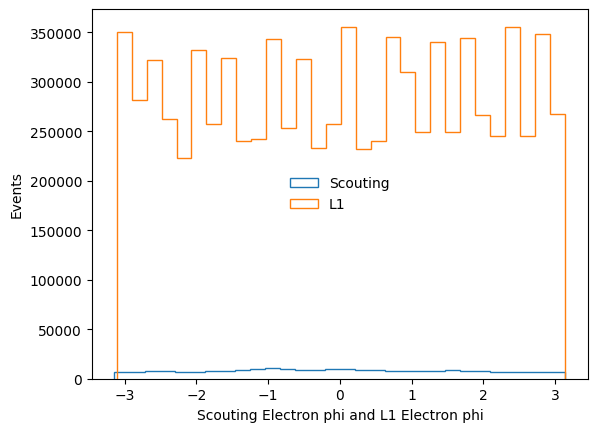

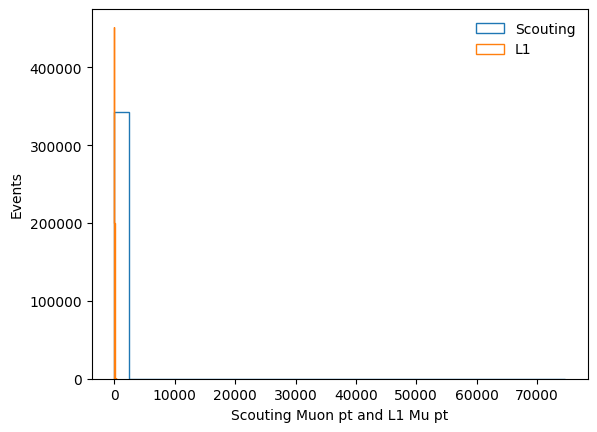

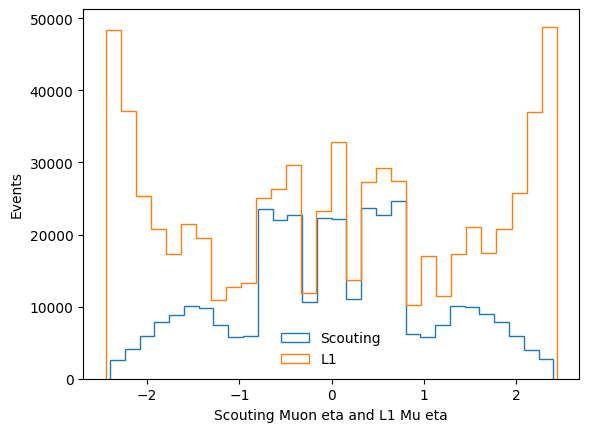

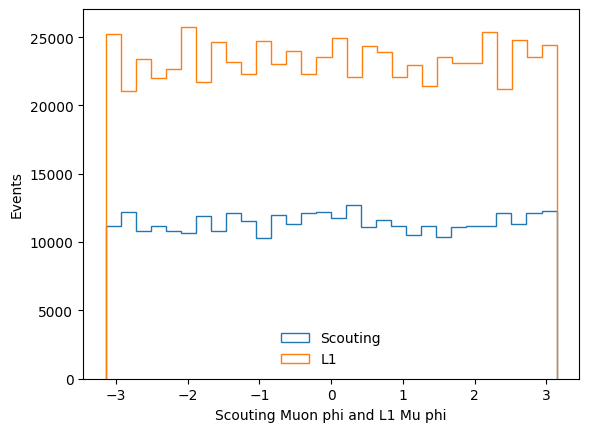

In [56]:
# So that I can index my dictionary
list_scout_l1 = list(scout_l1)

# For loop to automate all of these plots
for i in range(0, len(list_scout_l1), 2):
    scouting_key = list_scout_l1[i]
    scouting_value = ak.flatten(scout_l1[list(scout_l1)[i]])
    l1_key = list_scout_l1[i+1]
    l1_value = ak.flatten(scout_l1[list(scout_l1)[i+1]])

    plt.hist(scouting_value,
        bins=30,
     #    range = (0,400),
        label = "Scouting",
        histtype='step')

    plt.hist(l1_value,
        bins=30,
    #   range = (0,400),
        label = "L1",
        histtype='step')
    
    plt.xlabel(f"{scouting_key} and {l1_key}")
    plt.ylabel("Events")
    plt.legend(frameon=False)

    plt.show()

## Plotting number of particles per event

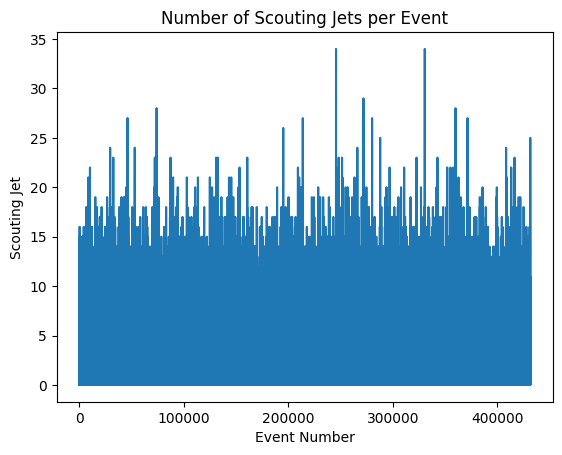

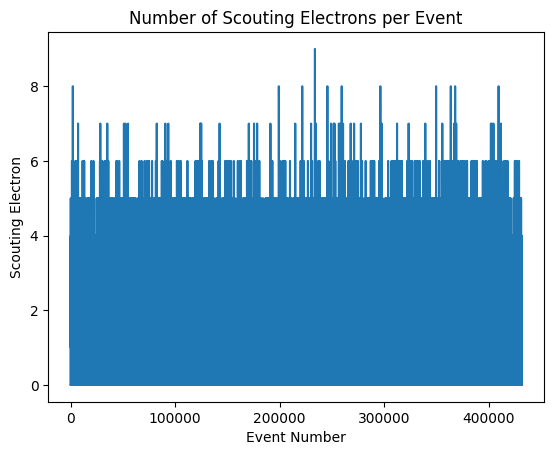

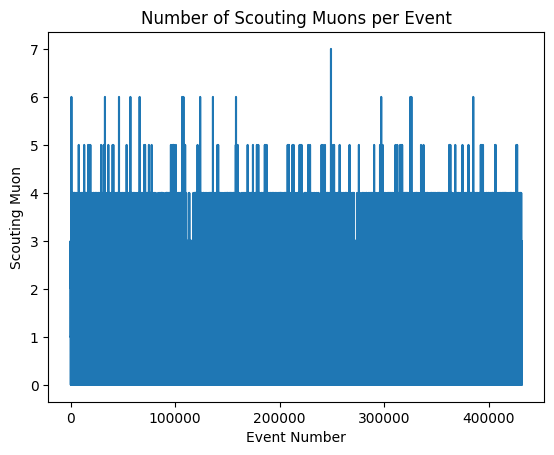

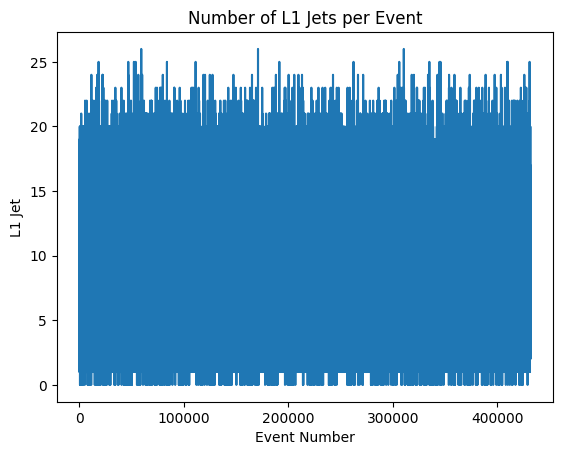

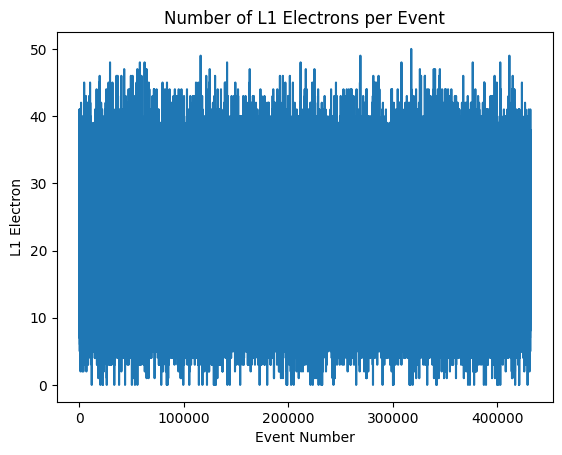

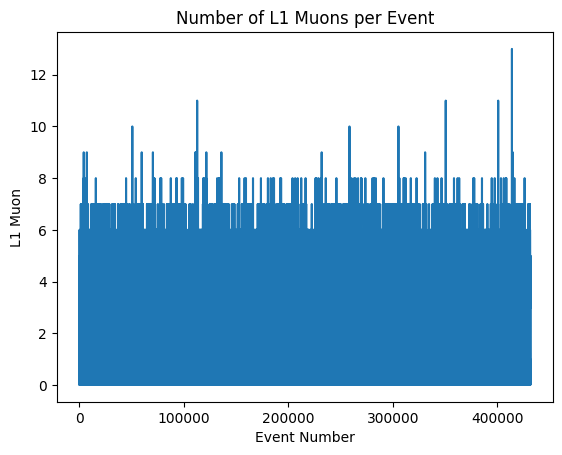

In [76]:
# Need event index on x axis, number of specific particle on y

num = {
    "Scouting Jet" : events["ScoutingJet_pt"].array(),
    "Scouting Electron" : events["ScoutingElectron_pt"].array(),
    "Scouting Muon" : events["ScoutingMuonNoVtx_pt"].array(),
    "L1 Jet" : events["L1Jet_pt"].array(),
    "L1 Electron" : events["L1EG_pt"].array(), # Again, maybe not electron!
    "L1 Muon" : events["L1Mu_pt"].array() 
}

for key, value in num.items():
    x = range(ak.num(value, axis = 0))
    y = ak.num(value, axis = 1)

    plt.plot(x, y)
    plt.xlabel("Event Number")
    plt.ylabel(key)
    plt.title(f"Number of {key}s per Event")

    plt.show()

#L1 jets and electrons are weird - why don't the bars go all the way down to 0? Too much information?
# Sorta a lot to look at! 

## Plotting in and above Z peak
Plot muon pt and eta distributions for events in the Z peak, and below the Z peak

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'm$_{\\mu\\mu}$ Invariant Mass')

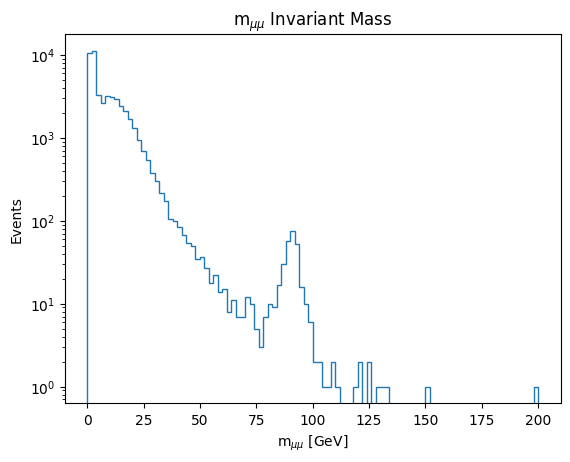

In [5]:
# Remind ourselves of the steps to get to that peak:
from pylorentz import Momentum4 # may need to restart notebook after install above

events = file["Events"]
muon_pt  = events["ScoutingMuonVtx_pt"].array()
muon_eta = events["ScoutingMuonVtx_eta"].array()
muon_phi = events["ScoutingMuonVtx_phi"].array()
muon_m   = events["ScoutingMuonVtx_m"].array()
muon_charge = events["ScoutingMuonVtx_charge"].array()

# Lets get the leading and subleading muons 
# First lets mask out any events where there are less than two muons per event
at_least_two_muons = ak.num(muon_pt,axis=1)==2
muon_pt1  = muon_pt[at_least_two_muons]
muon_eta1 = muon_eta[at_least_two_muons]
muon_phi1 = muon_phi[at_least_two_muons]
muon_m1   = muon_m[at_least_two_muons]
muon_charge1 = muon_charge[at_least_two_muons]

# Now let us require that both muons have an opposite charge (+1-1 = 0)
opposite_charge = ak.sum(muon_charge1,axis=1)==0
muon_pt2  = muon_pt1[opposite_charge]
muon_eta2 = muon_eta1[opposite_charge]
muon_phi2 = muon_phi1[opposite_charge]
muon_m2   = muon_m1[opposite_charge]
muon_charge2   = muon_charge1[opposite_charge]

muon1a= Momentum4.m_eta_phi_pt(muon_m2[:,0], muon_eta2[:,0], muon_phi2[:,0], muon_pt2[:,0])
muon2a= Momentum4.m_eta_phi_pt(muon_m2[:,1], muon_eta2[:,1], muon_phi2[:,1], muon_pt2[:,1])
dimuon2 = muon1a+muon2a

plt.hist(dimuon2.m,
         bins=100,
         range = (0,200),
         histtype='step')
plt.xlabel(r"m$_{\mu\mu}$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)
plt.yscale('log')
plt.title(r"m$_{\mu\mu}$ Invariant Mass")


**Note about boolean arrays**

Originally, I used this strategy, because it got cranky when I tried to put 75 < dimuon2.m < 115:

    in_peak = dimuon2.m < 115
    in_peak2 = dimuon2.m > 75
    in_peak_pt = muon_pt2[in_peak][in_peak2]

However, this didn't match with an if loop that I ran. I was sorta doubtful about this method to begin with, so opted for the longer if loop.


In [43]:
# Making our boolean arrays
in_peak = []
for i in range(len(dimuon2.m)):
    if dimuon2.m[i] > 75:
        if dimuon2.m[i] < 115:
            in_peak.append(True)
    else: 
        in_peak.append(False)

below_peak = dimuon2.m < 75

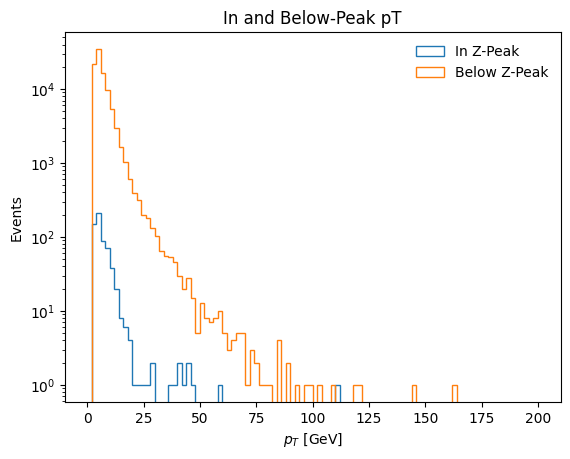

In [41]:
# Using sorted data (pairs + opposite charges)
# Look at pt on the same plot:
in_peak_pt = muon_pt2[in_peak]
below_peak_pt = muon_pt2[below_peak]

plt.hist(ak.flatten(in_peak_pt),
             bins=100,
             range = (0,200),
             label = "In Z-Peak",
             histtype='step')
plt.hist(ak.flatten(below_peak_pt),
             bins=100,
             range = (0,200),
             label = "Below Z-Peak",
             histtype='step')
plt.yscale("log")
plt.title("In and Below-Peak pT")
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Events")
plt.legend(frameon=False)



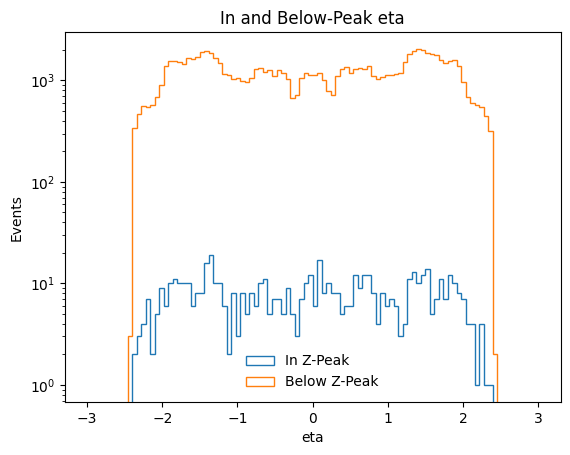

In [42]:
# Same for eta:
in_peak_eta = muon_eta2[in_peak]
below_peak_eta = muon_eta2[below_peak]

plt.hist(ak.flatten(in_peak_eta),
             bins=100,
             range = (-3,3),
             label = "In Z-Peak",
             histtype='step')
plt.hist(ak.flatten(below_peak_eta),
             bins=100,
             range = (-3,3),
             label = "Below Z-Peak",
             histtype='step')
plt.yscale("log")
plt.title("In and Below-Peak eta")
plt.xlabel("eta")
plt.ylabel("Events")
plt.legend(frameon=False)